<a href="https://www.kaggle.com/code/sarkarsoham/t20-wc-2024-eda?scriptVersionId=193210675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data

In [2]:
batsman = pd.read_csv('/kaggle/input/t20-world-cup-2024-dataset/T20WC24_Batsman.csv')
batsman.head()

,Player,Team,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s
0,Rahmanullah Gurbaz,AFG,7,7,0,281,40.14,223,126.00,0,3,1,18,16
1,TM Head,AUS,7,7,1,255,42.50,161,158.38,0,2,1,26,15
2,Ibrahim Zadran,AFG,7,7,0,229,32.71,210,109.04,0,2,1,25,4
3,N Pooran,WI,7,7,1,228,38.00,156,146.15,0,1,0,15,17
4,AGS Gous,USA,6,6,1,219,43.80,145,151.03,0,2,0,20,11


In [3]:
bowler = pd.read_csv('/kaggle/input/t20-world-cup-2024-dataset/T20WC24_Bowlers.csv')
bowler.head()

,Player,Team,Mat,Runs,Wkts,Econ
0,Fazalhaq Farooqi,AFG,7,149,16,6.38
1,Arshdeep Singh,IND,6,178,15,7.41
2,Rashid Khan,AFG,7,171,14,6.10
3,Rishad Hossain,BAN,7,194,14,7.76
4,Naveen-ul-Haq,AFG,7,145,13,6.12


# Summary of numerical columns

In [4]:
batsman.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000
mean,4.640000,4.126667,0.686667,72.640000,21.777867,63.366667,111.213600,0.0,0.286667,0.373333,5.753333,3.186667
std,1.727317,1.627353,0.820351,54.981666,16.058572,40.094422,31.940595,0.0,0.605752,0.596935,5.173418,3.507206
min,1.000000,1.000000,0.000000,17.000000,0.000000,9.000000,43.180000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,29.000000,11.500000,32.000000,88.085000,0.0,0.000000,0.000000,2.000000,1.000000
50%,4.000000,4.000000,0.500000,58.500000,17.125000,51.000000,109.835000,0.0,0.000000,0.000000,4.000000,2.000000
75%,7.000000,5.750000,1.000000,101.000000,28.855000,82.000000,133.700000,0.0,0.000000,1.000000,8.000000,4.000000
max,7.000000,7.000000,3.000000,281.000000,120.000000,223.000000,222.220000,0.0,3.000000,3.000000,26.000000,17.000000


In [5]:
bowler.describe()

,Mat,Runs,Wkts,Econ
count,100.000000,100.000000,100.000000,100.000000
mean,4.500000,90.460000,5.620000,6.521800
std,1.800673,47.177383,3.434172,1.505064
min,1.000000,9.000000,2.000000,3.000000
25%,3.000000,52.500000,3.000000,5.592500
50%,4.000000,80.000000,5.000000,6.390000
75%,6.000000,137.500000,7.250000,7.582500
max,7.000000,194.000000,16.000000,10.250000


# Check Data types

In [6]:
batsman.info()
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  150 non-null    object 
 1   Team    150 non-null    object 
 2   Mat     150 non-null    int64  
 3   Inns    150 non-null    int64  
 4   NO      150 non-null    int64  
 5   Runs    150 non-null    int64  
 6   Ave     150 non-null    float64
 7   BF      150 non-null    int64  
 8   SR      150 non-null    float64
 9   100     150 non-null    int64  
 10  50      150 non-null    int64  
 11  0       150 non-null    int64  
 12  4s      150 non-null    int64  
 13  6s      150 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Team    100 non-null

# Check for missing values

In [7]:
batsman.isnull().sum()

Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

In [8]:
bowler.isnull().sum()

Player    0
Team      0
Mat       0
Runs      0
Wkts      0
Econ      0
dtype: int64

# Univariate Analysis

## Batsman Run Distribution

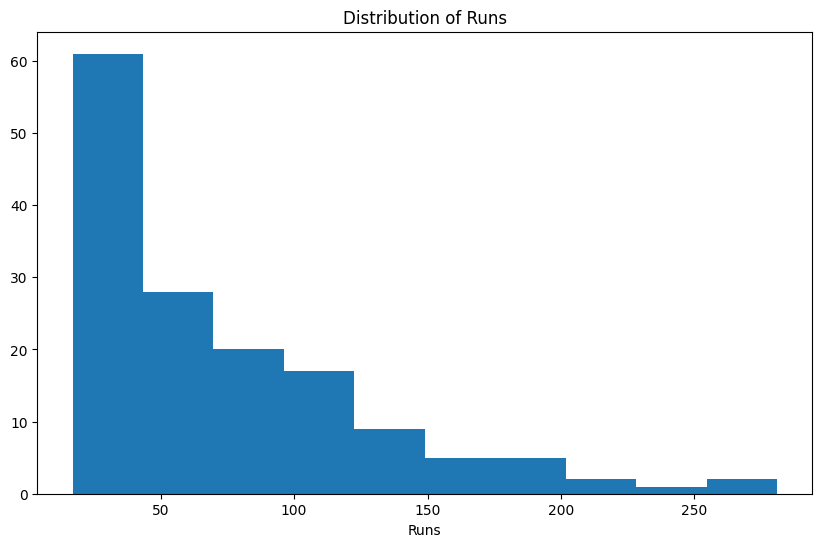

In [9]:
plt.figure(figsize=(10,6))
plt.hist(batsman['Runs'])
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.show()

Based on the distribution of runs from the histogram:

1. **Skewness**: The distribution is heavily right-skewed, indicating that most batsmen have scored fewer runs. There are relatively few instances of batsmen scoring high runs.

2. **Common Range**: The most frequent range of runs scored lies between 0 to 50 runs, as the highest bar represents this range. This suggests that in this dataset, a majority of the batsmen have not crossed the 50-run mark.

3. **Fewer High Scores**: The frequency of high scores (above 100 runs) decreases significantly. This shows that scoring more than 100 runs is a rare occurrence among the batsmen in the dataset.

4. **Potential Outliers**: The tail of the distribution extends towards higher runs (around 250), which may indicate the presence of outliers—batsmen who scored exceptionally high compared to others.

5. **Performance Distribution**: The histogram suggests that most batsmen perform within a modest range, while only a few stand out with much higher scores.

## Bowlers Wicket Distribution

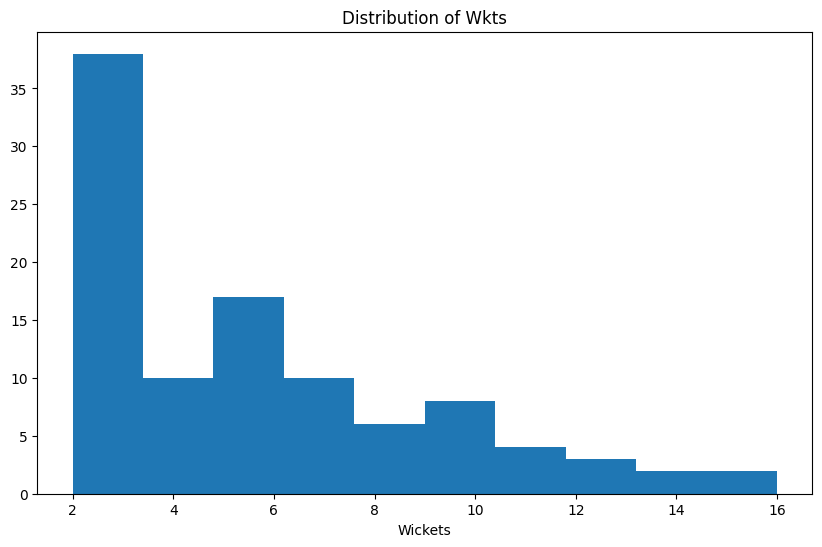

In [10]:
plt.figure(figsize=(10,6))
plt.hist(bowler['Wkts'])
plt.title('Distribution of Wkts')
plt.xlabel('Wickets')
plt.show()

Based on the distribution of runs from the histogram:

1. **Skewness**: The distribution is heavily right-skewed, indicating that most bowlers have taken fewer wickets.

2. **Common Range**: Most bowlers have taken 2-3 wickets. There are more or less equal number of bowlers with more wickets but the number of wicket taker decreases with 10 or more wkts

3. **Potential Outliers**: The tail of the distribution extends towards higher wkts (around 14), which may indicate the presence of outliers—bowlers who performed exceptionally well compared to others.

4. **Performance Distribution**: The histogram suggests that most bowlers performed within a modest range, while only a few stand out with much higher scores.

# Bivariate Analysis

## Runs vs Strike Rate

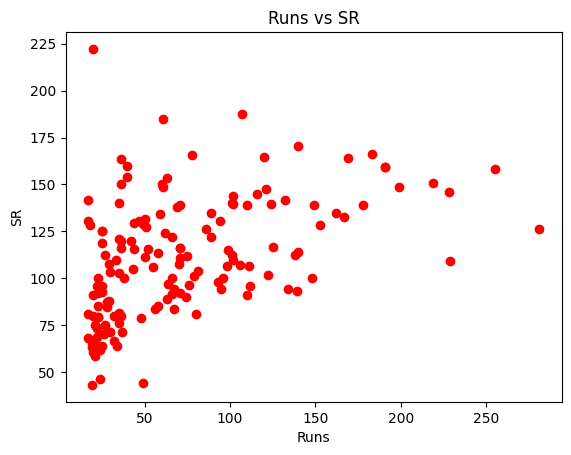

In [11]:
plt.scatter(x=batsman['Runs'], y=batsman['SR'], color='red')
plt.title('Runs vs SR')
plt.xlabel('Runs')
plt.ylabel('SR')
plt.show()

## Wickets vs Economy

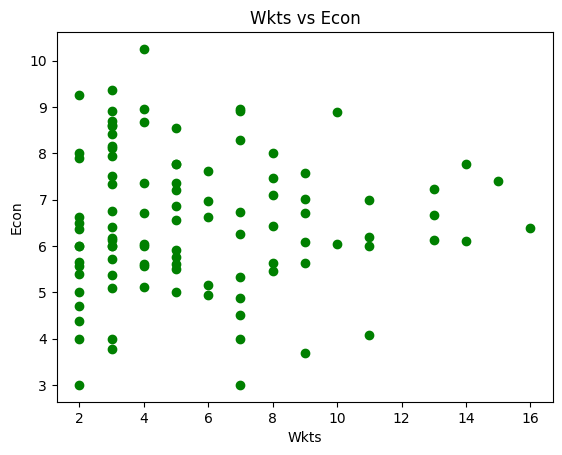

In [12]:
plt.scatter(x=bowler['Wkts'], y=bowler['Econ'], color='green')
plt.title('Wkts vs Econ')
plt.xlabel('Wkts')
plt.ylabel('Econ')
plt.show()

# Advanced Analysis

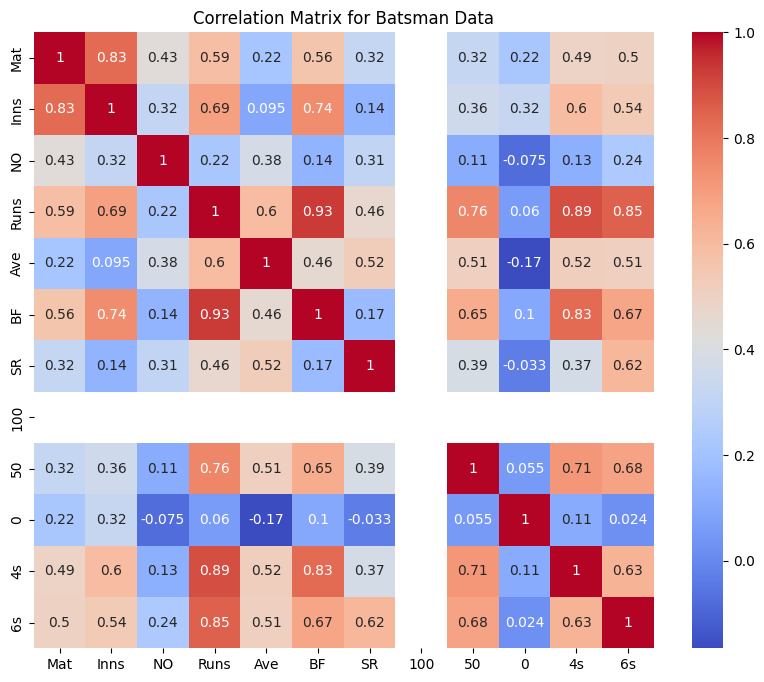

In [13]:
# Select only numeric columns
numeric_batsman_df = batsman.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_batsman_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Batsman Data')
plt.show()

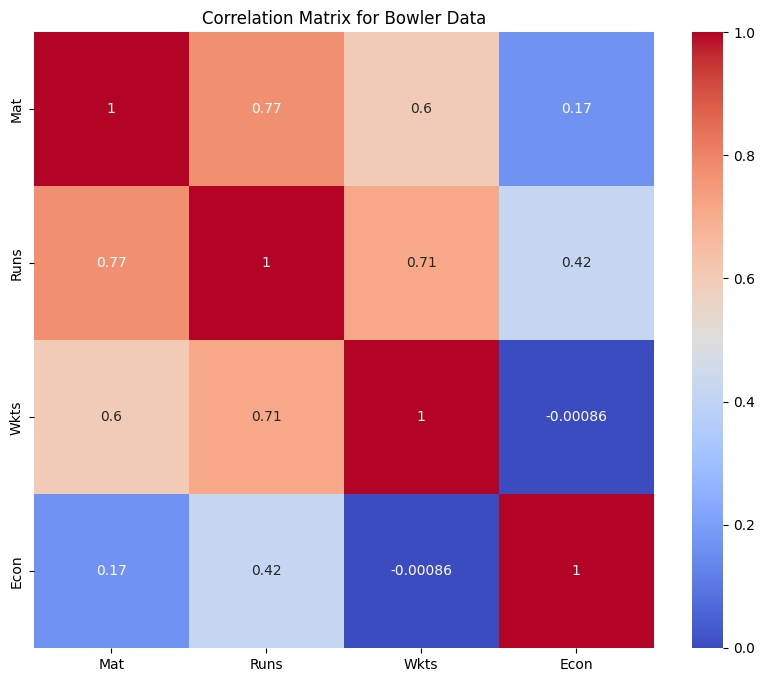

In [14]:
# Select only numeric columns
numeric_bowler_df = bowler.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_bowler_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Bowler Data')
plt.show()